In [20]:
import numpy as np
import scipy.stats as stats
import matplotlib.pyplot as plt

In [10]:
def logsumexp(x):
    #x is an array
    m = max(x)
    return m + np.log(sum(np.exp(x - m)))

In [11]:
h = np.arange(0.01, 1, 0.01)

In [13]:
log_prior = -50 * h #unnormalized
log_prior = log_prior - logsumexp(log_prior) #normalized prior

Let's look at how the `logsumexp` function normalizes the prior:

In [ ]:
# exp(log.prior) = exp(log.prior - logsumexp(log.prior))
#                  exp(log.prior)/exp(logsumexp(log.prior))
#                  exp(log.prior)/sum(exp(log.prior))
#                      prior / sum(prior)

In [14]:
nH = 2
nT = 1

`log_likelihood` shows what probability each hypothesis assigns to the observed data (2 heads and 1 tail) 

In [17]:
log_likelihood = [stats.binom.logpmf(nH, nH + nT, hyp) for hyp in h]

In [ ]:
# P(H|DATA) = P(DATA|H) P(H) / P(DATA)
# log P(H|DATA) = log P(DATA|H) + log P(H) - log P(DATA)

#                log P(H)   log(DATA|H)      log(sum_H P(H) P(DATA|H))


Using Bayes' Rule and log properties to compute posteriors:

$P(H | D) = \frac{P(D|H) P(H)}{P(D)}$

$\log P(H | D) = \log P(D|H) + \log P(H) - \log P(D)$

$\log P(H | D) = \log P(H) + \log P(D|H) - \log \sum_{\forall h \in H} P(h) P(D|h)$

In [19]:
log_posterior = log_prior + log_likelihood - logsumexp(log_prior + log_likelihood)

In [ ]:
plot(h, exp(log.posterior), type="l")
lines(h, exp(weak.prior), col=4)
lines(h, exp(with.uniform), col=2)


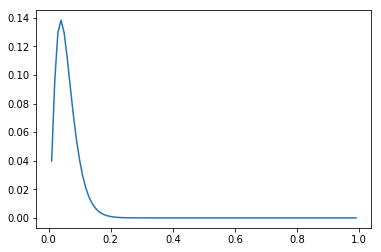

In [22]:
plt.plot(h, np.exp(log_posterior)) #Does this graph look ok?

Not sure about `weak.prior` and `with.uniform`

### Part B: Rejection Sampling

This is a basic method of generating samples from a distribution

In [23]:
xes = np.arange(0, 10, 0.1)

In [24]:
def f(x): #arbitrary function
    return np.exp(x**1.5 - 3 * x)

The original curve

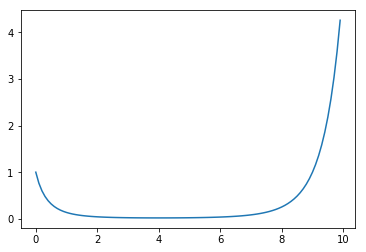

In [25]:
plt.plot(xes, f(xes))

In [26]:
samples = []

for i in np.arange(100000):
    x = np.random.choice(xes)
    y = np.random.uniform(0, 6)
    if y < f(x): #accept if a random value is less than f(x)
        samples.append(x)
    

By using our sampler many times, our distribution looks like the original curve!

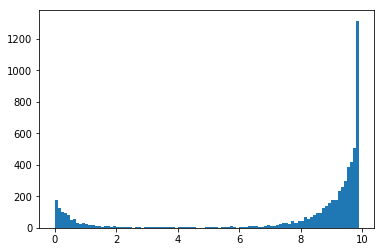

In [29]:
histogram = plt.hist(samples, bins = xes)